sometimes, you need to pick an English name for yourself because you are moving to America (or another English-speaking country) or need to interact with Americans in business; the best way to choose a good name is choosing one from the most popular English names for your gender during the year you were born. However, you may also want to find a name which soundsd similar to your name, and start with the first letter of your real name. In this notebook, you can easily put your rela name, your year of birth and gender and you will found out which name suits you. 

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import operator
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/us-baby-names/hashes.txt
/kaggle/input/us-baby-names/StateReadMe.pdf
/kaggle/input/us-baby-names/NationalReadMe.pdf
/kaggle/input/us-baby-names/database.sqlite
/kaggle/input/us-baby-names/StateNames.csv
/kaggle/input/us-baby-names/NationalNames.csv


In [57]:
national_df= pd.read_csv("../input/us-baby-names/NationalNames.csv")

Here, simply define your gender, birth year and real name;

In [58]:
target_gender='F'

In [59]:
target_year=1989

In [60]:
target_name='Parva'

In genral, the most popular names in your birth year are: 

In [61]:
year_gender_matched_df=national_df[(national_df['Gender']==target_gender) & (national_df['Year']==target_year)]
year_gender_matched_df.head(20)['Name']


1045685      Jessica
1045686       Ashley
1045687     Brittany
1045688       Amanda
1045689        Sarah
1045690     Samantha
1045691     Jennifer
1045692    Stephanie
1045693       Lauren
1045694    Elizabeth
1045695        Megan
1045696       Nicole
1045697        Emily
1045698        Amber
1045699      Heather
1045700      Tiffany
1045701     Danielle
1045702       Rachel
1045703      Melissa
1045704        Kayla
Name: Name, dtype: object

Let's check it in a pie-plot:

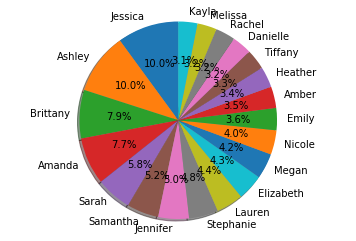

In [62]:
labels=year_gender_matched_df.head(20)['Name']
sizes=year_gender_matched_df.head(20)['Count']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

but we are looking for something similar to our real name:

In [63]:
new_columns= ['Name','Count', 'Similarity']

new_df=pd.DataFrame(columns=new_columns)

for index, row in year_gender_matched_df.iterrows():
    dist=nltk.edit_distance(target_name, row['Name'])
    temp_df=pd.DataFrame([[ row['Name'], row['Count'],1/dist]], columns=new_columns)
    new_df=pd.concat([temp_df,new_df])

In [64]:
new_df

,Name,Count,Similarity
0,Zsazsa,5,0.250000
0,Zoi,5,0.200000
0,Zenita,5,0.200000
0,Zelene,5,0.166667
0,Zeena,5,0.250000
...,...,...,...
0,Sarah,27790,0.333333
0,Amanda,36826,0.250000
0,Brittany,37786,0.142857
0,Ashley,47586,0.166667


In [65]:
new_df=new_df.sort_values(by=['Similarity','Count'],ascending=False)

So, the most popular names which are similar to your real name is:

In [66]:
new_df.head(20)['Name']

0    Marva
0     Sara
0    Maria
0     Tara
0     Kara
0     Cara
0    Carla
0    Karla
0    Paula
0     Lara
0     Mara
0    Paris
0    Perla
0    Paola
0     Dara
0    Marla
0    Marta
0    Darla
0    Daria
0    Tarra
Name: Name, dtype: object

let's see them in pie-plot:

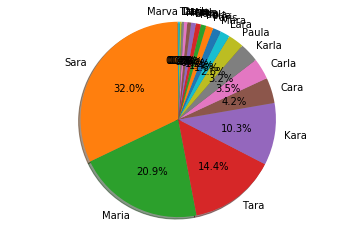

In [67]:
labels=new_df.head(20)['Name']
sizes=new_df.head(20)['Count']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

if you want to match the first letter of suugested name match with the target name:

In [68]:
target_name[0]

'P'

In [69]:
matching_with_start_char_df=new_df[new_df['Name'].str.match(target_name[0])]

        

In [70]:
matching_with_start_char_df

,Name,Count,Similarity
0,Paula,793,0.500000
0,Paris,367,0.500000
0,Perla,267,0.500000
0,Paola,255,0.500000
0,Parisa,31,0.500000
...,...,...,...
0,Persephone,14,0.125000
0,Priscillia,12,0.125000
0,Pleshette,6,0.125000
0,Prescious,5,0.125000


In [71]:
list(matching_with_start_char_df['Name'])

['Paula',
 'Paris',
 'Perla',
 'Paola',
 'Parisa',
 'Pasha',
 'Purvi',
 'Patra',
 'Patria',
 'Paige',
 'Pamela',
 'Porsha',
 'Portia',
 'Pearl',
 'Paloma',
 'Priya',
 'Patsy',
 'Pa',
 'Page',
 'Porcha',
 'Petra',
 'Pooja',
 'Patty',
 'Paul',
 'Puja',
 'Pang',
 'Patrina',
 'Payal',
 'Perry',
 'Perri',
 'Parris',
 'Patrica',
 'Pia',
 'Patti',
 'Peri',
 'Parker',
 'Pakou',
 'Pamala',
 'Parish',
 'Persia',
 'Palak',
 'Pahoua',
 'Pablo',
 'Porcia',
 'Panhia',
 'Pat',
 'Parveen',
 'Parisha',
 'Pam',
 'Perel',
 'Pati',
 'Pansy',
 'Paj',
 'Pagan',
 'Pachia',
 'Patricia',
 'Patrice',
 'Paulina',
 'Peggy',
 'Penny',
 'Porscha',
 'Pilar',
 'Porche',
 'Polly',
 'Porshia',
 'Patrick',
 'Piper',
 'Porchia',
 'Patrisha',
 'Porshe',
 'Phaedra',
 'Peter',
 'Porchea',
 'Penina',
 'Payton',
 'Prisma',
 'Pascale',
 'Prisca',
 'Poonam',
 'Perlita',
 'Pamella',
 'Phebe',
 'Pessy',
 'Pattie',
 'Patrece',
 'Pegah',
 'Pedro',
 'Pearlie',
 'Pallavi',
 'Preeya',
 'Phung',
 'Perrin',
 'Parrish',
 'Pandora',
 'Pal

the distribution of names ( we need to remove names that are not popular, they are as bad as our own names! )

<BarContainer object of 192 artists>

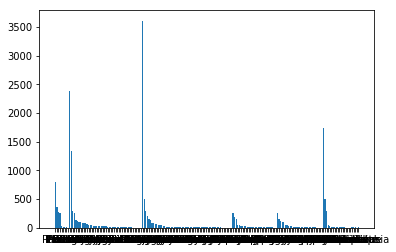

In [72]:
plt.bar(matching_with_start_char_df['Name'],matching_with_start_char_df['Count'])

as it is shown, many names are not popular at all, so we can remove them 

In [73]:
matching_with_start_char_df=matching_with_start_char_df[matching_with_start_char_df['Count']>500]

<BarContainer object of 4 artists>

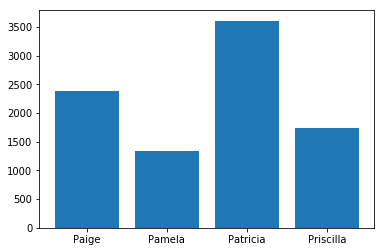

In [74]:
plt.bar(matching_with_start_char_df['Name'],matching_with_start_char_df['Count'])

Text(0, 0.5, 'popularity')

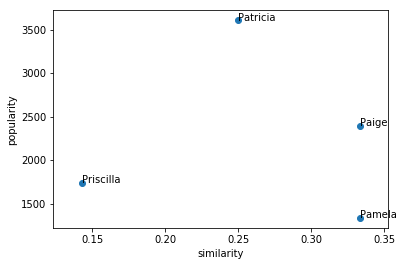

In [75]:
x = list(matching_with_start_char_df['Similarity'])
y = list(matching_with_start_char_df['Count'])
plt.scatter(x, y)

labels=list(matching_with_start_char_df['Name'])
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]))
# plt.rcParams["figure.figsize"] = (20,4)
plt.xlabel("similarity")
plt.ylabel("popularity")